# Building an Image Classifier

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from sklearn.model_selection import train_test_split


2024-11-22 12:19:03.351005: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-22 12:19:03.849579: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-22 12:19:04.154529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732263544.388812  364991 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732263544.453574  364991 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-22 12:19:04.983981: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
from sklearn.decomposition import PCA

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
data_dir= '../../data/dataset/processed_datasets/ecg_images/numpy'

In [5]:
#file paths
X_train_path = os.path.join(data_dir, 'X_train.npy')
y_train_path = os.path.join(data_dir, 'y_train.npy')
X_test_path = os.path.join(data_dir, 'X_test.npy')
y_test_path = os.path.join(data_dir, 'y_test.npy')

# Load the training data
X_train_full = np.load(X_train_path)
y_train_full = np.load(y_train_path)

# Load the testing data
X_test = np.load(X_test_path)
y_test = np.load(y_test_path) 

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

: 

In [10]:
X_valid = X_valid.astype('float32') / 255.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [11]:
# Get maximum and minimum values for each array
max_train = np.max(X_train)
min_train = np.min(X_train)

max_valid = np.max(X_valid)
min_valid = np.min(X_valid)

max_test = np.max(X_test)
min_test = np.min(X_test)

# Print the results
print("X_train: Max =", max_train, ", Min =", min_train)
print("X_valid: Max =", max_valid, ", Min =", min_valid)
print("X_test: Max =", max_test, ", Min =", min_test)

X_train: Max = 1.0 , Min = 0.0
X_valid: Max = 1.0 , Min = 0.0
X_test: Max = 1.0 , Min = 0.0


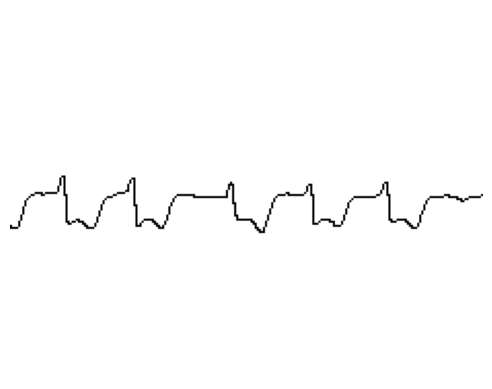

In [12]:
plt.imshow(X_train[5], cmap="binary")
plt.axis('off')
plt.show()

In [13]:
unique_labels, counts = np.unique(y_train_full, return_counts=True)
print("Unique labels:", unique_labels)
print("Counts:", counts)


Unique labels: [0 1 2 3]
Counts: [2242 2259 2775 1632]


In [14]:
unique_labels, counts = np.unique(y_train, return_counts=True)
print("Unique labels:", unique_labels)
print("Counts:", counts)

Unique labels: [0 1 2 3]
Counts: [1778 1814 2227 1307]


In [15]:
y_train.dtype

dtype('int64')

0: HB
1: MI
2: Normal
3: PMI

In [16]:
class_names = ['HB', 'MI', 'Normal', 'PMI']

In [17]:
X_valid.shape

(1782, 180, 230)

In [18]:
X_test.shape

(2228, 180, 230)

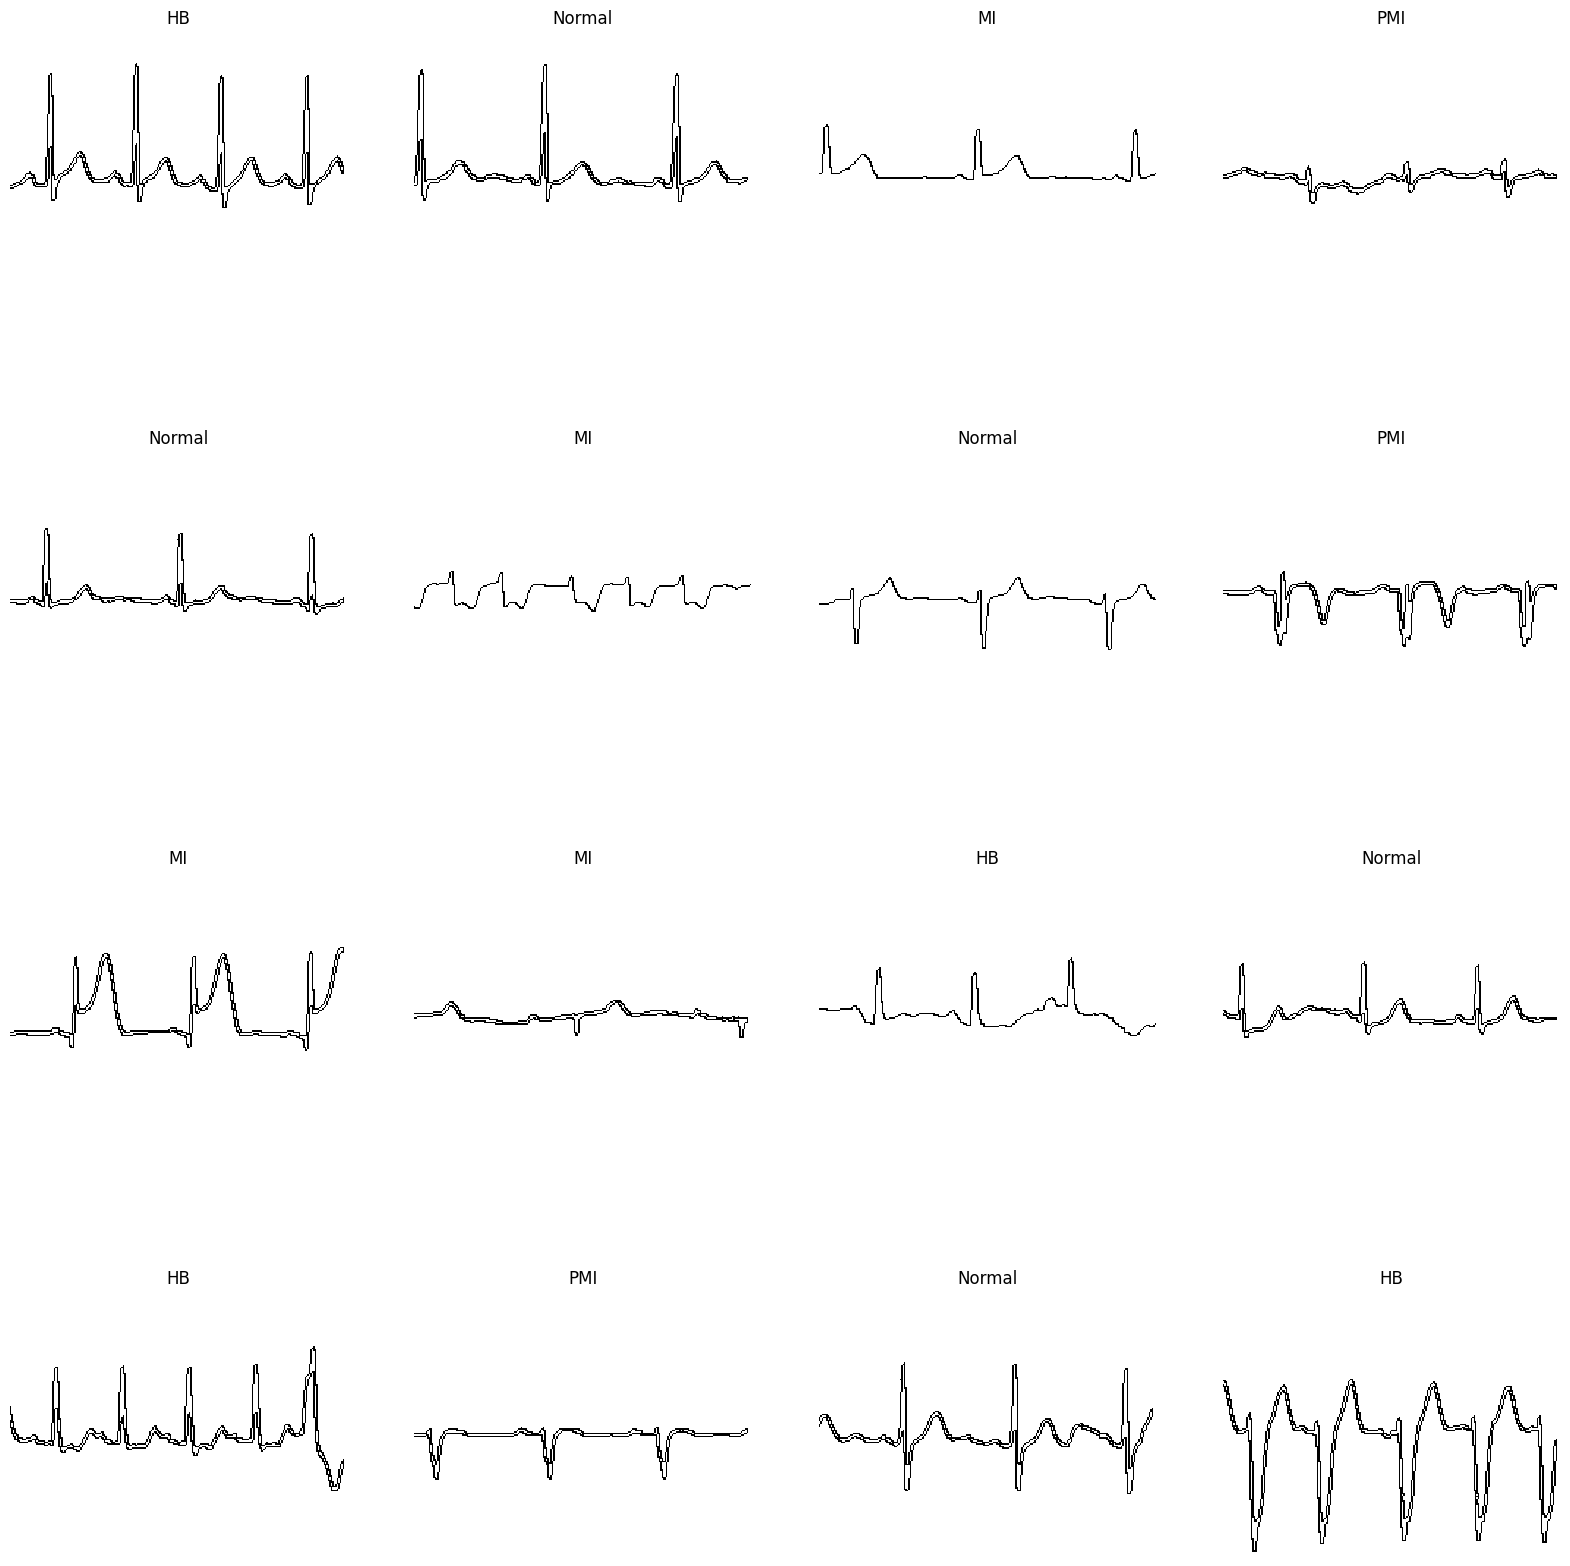

In [19]:
n_rows = 4
n_cols = 4
plt.figure(figsize=(n_cols * 5, n_rows * 5))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[180, 230]),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(4, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <BatchNormalization name=batch_normalization, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>,
 <BatchNormalization name=batch_normalization_1, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_2, built=True>,
 <BatchNormalization name=batch_normalization_2, built=True>,
 <Dropout name=dropout_2, built=True>,
 <Dense name=dense_3, built=True>]

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 41400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │       8,280,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           3,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,304,992 (31.68 MB)

 Trainable params: 8,304,328 (31.68 MB)

 Non-trainable params: 664 (2.59 KB)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer ="sgd",
              metrics=["accuracy"])

In [25]:

history = model.fit(X_train, y_train, epochs=40,
                    validation_data=(X_valid, y_valid),
                     callbacks=[early_stopping])

Epoch 1/40
223/223 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - accuracy: 0.2628 - loss: 2.1256 - val_accuracy: 0.4416 - val_loss: 1.2628
Epoch 2/40
223/223 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.3356 - loss: 1.4368 - val_accuracy: 0.4703 - val_loss: 1.2379
Epoch 3/40
223/223 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.3833 - loss: 1.3215 - val_accuracy: 0.4764 - val_loss: 1.2044
Epoch 4/40
223/223 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.4244 - loss: 1.2620 - val_accuracy: 0.5028 - val_loss: 1.1758
Epoch 5/40
223/223 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.4516 - loss: 1.2297 - val_accuracy: 0.5191 - val_loss: 1.1294
Epoch 6/40
223/223 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.4711 - loss: 1.1865 - val_accuracy: 0.5662 - val_loss: 1.0713
Epoch 7/40
223/223 ━━━━━━━━━━━━━━━━━━━━ 24s 72ms/step - accuracy: 0.4883 - loss: 1.1362 - val_accuracy: 0.5859 - val_loss: 1.0155
Epoch 8/40
223/223 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.5178 - loss: 1.0916 - 

In [26]:
history.history.keys() # contains the  metrics measured at the end of each epoch on the training set and on the validation set

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

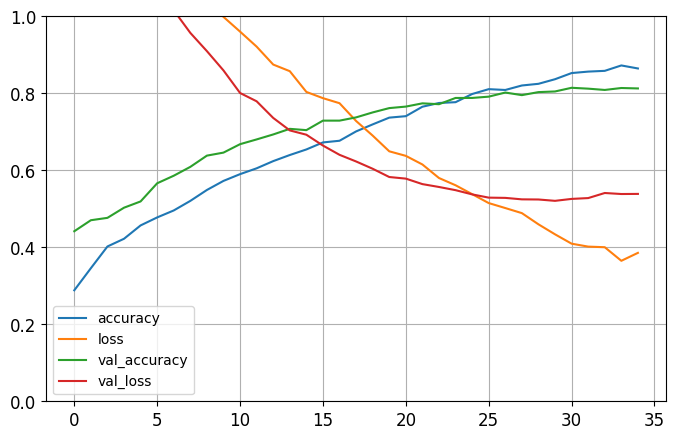

In [27]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [42]:
loss, accuracy = model.evaluate(X_test, y_test) # now finally time to evaluate your model on the testing set

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8189 - loss: 0.4718


In [43]:
# Print the metrics
print("Loss: ", loss)
print("Accuracy: ", accuracy)

Loss:  0.4785529375076294
Accuracy:  0.8141831159591675


In [44]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Print classification report
print(classification_report(y_test, y_pred, target_names=class_names))

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
              precision    recall  f1-score   support

          HB       0.78      0.67      0.72       554
          MI       0.97      1.00      0.99       609
      Normal       0.76      0.84      0.79       633
         PMI       0.71      0.71      0.71       432

    accuracy                           0.81      2228
   macro avg       0.81      0.80      0.80      2228
weighted avg       0.81      0.81      0.81      2228



70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step


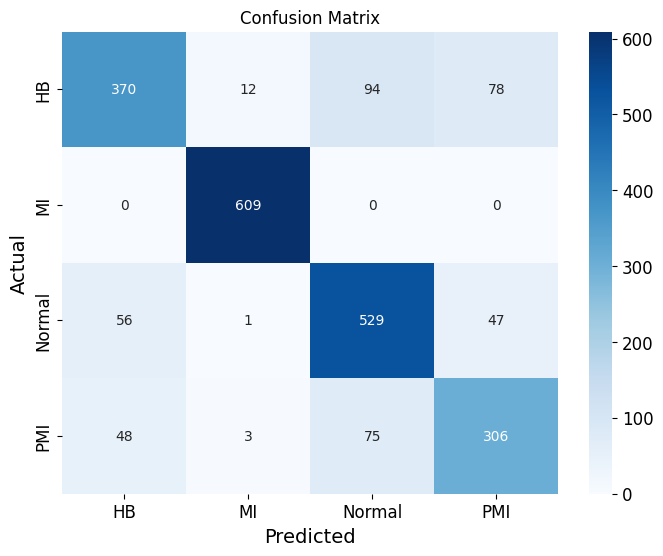

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with details
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [40]:
class_names

['HB', 'MI', 'Normal', 'PMI']

In [35]:
X_new = X_test[:5] # make predictions on  first 5 instances of the test set
y_proba = model.predict(X_new)
y_proba.round(2) # For each instance the model estimates one probability per class, from class 0 to class 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


array([[0.01, 0.  , 0.95, 0.03],
       [0.96, 0.  , 0.02, 0.02],
       [0.03, 0.01, 0.8 , 0.17],
       [0.49, 0.  , 0.05, 0.46],
       [0.  , 0.99, 0.  , 0.  ]], dtype=float32)

In [36]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([2, 0, 2, 0, 1])

In [37]:
np.array(class_names)[y_pred]

array(['Normal', 'HB', 'Normal', 'HB', 'MI'], dtype='<U6')

In [38]:
y_new = y_test[:5]
class_names[y_new[0]], class_names[y_new[1]], class_names[y_new[2]],class_names[y_new[3]],class_names[y_new[4]]

('Normal', 'HB', 'Normal', 'PMI', 'MI')

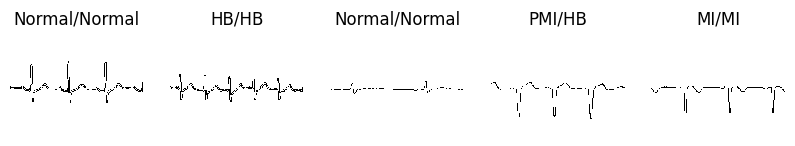

In [50]:
plt.figure(figsize=(10, 4))
for index, image in enumerate(X_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_new[index]] + '/' + class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()